In [ ]:
#installing required dependencies
#DO NOT modify the cell

import os, sys 
from google.colab import drive 
drive.mount('/content/gdrive') 
!pip3 install box2d-py==2.3.8

!apt-get install python-opengl -y
!pip3 install pyvirtualdisplay
!pip3 install xvfbwrapper
!apt-get install x11-utils > /dev/null 2>&1 
!pip3 install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip3 install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb x11-utils
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
  Using cached PyVirtualDisplay-0.2.5-py2.py3-n

In [ ]:
#Import necessary libraries
#DO NOT modlify

import numpy as np
import gym
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

Agent Class

In [ ]:
#AGENT class

from keras.layers import Dense,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential,Model
from tensorflow.keras.losses import categorical_crossentropy
import keras.backend as k
from tensorflow.python.framework.ops import disable_eager_execution
import tensorflow as tf
disable_eager_execution()


class Agent:
 # Initialisation of default parameters 
  def __init__(self,obs,act):
    

    self.state_shape=obs
    self.action_space=act
    self.gamma=0.99
    self.lr=0.0005
    self.t_states=[]
    self.t_actions=[]
    self.t_rewards=[]
    self.G=0
    self.total_rewards=[]
    self.model=self.build_model()
    
    
# Defining the model and loss function "categorical_crossentropy with Adam optimizer"
  def build_model(self):
    
    input=Input(shape=(self.state_shape,))
    
    
    d1=Dense(64,activation='relu')(input)
    d2=Dense(64,activation='relu')(d1)
    prob_a=Dense(self.action_space,activation='softmax')(d2)
    model=Model(inputs=[input],outputs=[prob_a])    
    model.compile(loss="categorical_crossentropy",optimizer=Adam(learning_rate=self.lr))
    
    
    return model
    
# Function to choose action based on the current policy, returns the action index of a single chosen action
  def choose_action(self,state):
    state=state[np.newaxis,:]
    probabilites=self.model.predict(state)[0]
    # print(probabilites[0][0])
    action=np.random.choice(self.action_space,p=probabilites)
    return action

#Function to store the state,action,rewards of the trajectory

  def save_trajectory(self,state,action,reward):
    self.t_states.append(state)
    #one hot encode actions
    act_vec=np.zeros([self.action_space,])
    act_vec[action]=1
    self.t_actions.append(act_vec)
    # self.t_actions.append(action)
    self.t_rewards.append(reward)
    return

# Function to calculate the expected future rewards and provide input of states, y_true=actions and sample weight as self.G 
#which has the expected future rewards to be multiplied with the log of prob(a_t|s_t).

  def learn(self):
    t_states=np.array(self.t_states)
    t_rewards=np.array(self.t_rewards)
    t_actions=np.array(self.t_actions)
    actions=t_actions
    G=np.zeros_like(t_rewards)

    for t in range(len(t_rewards)):
      G_sum=0
      discount=1
      for j in range(t,len(t_rewards)):
        G_sum+=t_rewards[j]*discount
        discount*=self.gamma
      G[t]=G_sum
    mean=np.mean(G)
    std=np.std(G)
    if np.std(G)>0:
      std=np.std(G)      
    else:
      std= 1

    self.G=(G-mean)/std
    self.model.train_on_batch(t_states, t_actions, sample_weight=self.G)
    
    
    self.t_states=[]
    self.t_actions=[]
    self.t_rewards=[]
    return 

# Function to save the trained model. Create a folder in your Google Drive and specify the path here
  def save_model(self):
    self.model.save('/content/gdrive/My Drive/lunar lander final/model_pg.h5')

#Function to load the trained model. Specify the path where your trained model is saved in your Google Drive
    
  def load_model(self):
    model=self.model.load('/content/gdrive/My Drive/lunar lander final/model_pg.h5')
    return model








In [ ]:
#Dependencies for recording the video
#DO NOT modify
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()
import tensorflow as tf
import datetime, os

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
     |████████████████████████████████| 67 kB 1.0 MB/s 


Train Loop

Box(-inf, inf, (8,), float32)
8 4
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 4,996
Trainable params: 4,996
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


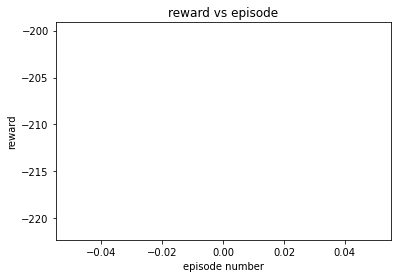

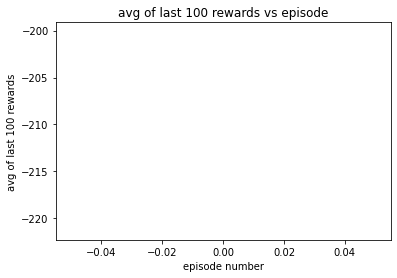

episode 0   ep_reward -210.70889294865492    mean_reward_100 -210.70889294865492
episode 1   ep_reward -76.82391556810228    mean_reward_100 -143.7664042583786
episode 2   ep_reward -329.82512797029256    mean_reward_100 -205.78597882901659
episode 3   ep_reward -119.7558242791512    mean_reward_100 -184.27844019155023
episode 4   ep_reward -63.13204312491883    mean_reward_100 -160.04916077822395
episode 5   ep_reward -547.0565399365589    mean_reward_100 -224.55039063794644
episode 6   ep_reward -101.14169579126337    mean_reward_100 -206.9205770884203
episode 7   ep_reward -193.35822644855722    mean_reward_100 -205.2252832584374
episode 8   ep_reward -315.82953116634434    mean_reward_100 -217.51464413709374
episode 9   ep_reward -403.9796588500023    mean_reward_100 -236.1611456083846
episode 10   ep_reward -383.7793245690881    mean_reward_100 -249.58098005935764
episode 11   ep_reward -398.7987596487569    mean_reward_100 -262.0157950251409
episode 12   ep_reward -97.05107043380

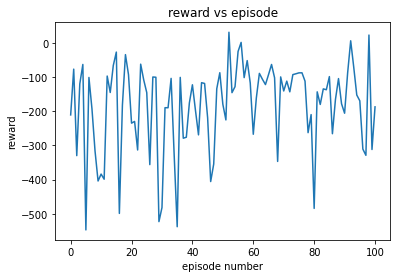

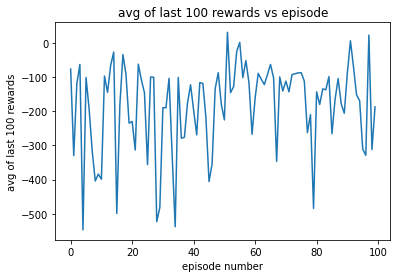

episode 100   ep_reward -187.13283775574982    mean_reward_100 -183.54825325694412
episode 101   ep_reward -115.38421966886398    mean_reward_100 -183.93385629795176
episode 102   ep_reward -157.74222682037117    mean_reward_100 -182.21302728645253
episode 103   ep_reward -394.60153674705776    mean_reward_100 -184.96148441113158
episode 104   ep_reward -210.63026087209994    mean_reward_100 -186.43646658860337
episode 105   ep_reward -106.48482937725801    mean_reward_100 -182.03074948301037
episode 106   ep_reward -105.751402925409    mean_reward_100 -182.07684655435187
episode 107   ep_reward 15.824360146726107    mean_reward_100 -179.985020688399
episode 108   ep_reward -226.4353020166264    mean_reward_100 -179.09107839690182
episode 109   ep_reward -78.25293478464646    mean_reward_100 -175.83381115624826
episode 110   ep_reward -152.70006351997404    mean_reward_100 -173.52301854575714
episode 111   ep_reward -52.89741090901008    mean_reward_100 -170.06400505835964
episode 112 

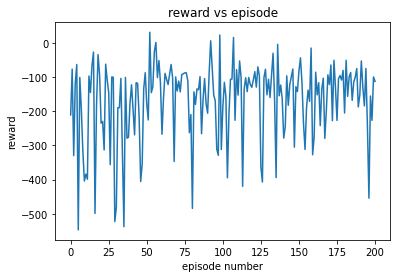

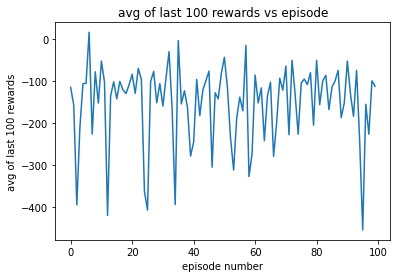

episode 200   ep_reward -112.55744926925054    mean_reward_100 -151.5677516283905
episode 201   ep_reward -61.73929450699419    mean_reward_100 -151.0313023767718
episode 202   ep_reward -100.60329629807202    mean_reward_100 -150.4599130715488
episode 203   ep_reward -124.9457470776064    mean_reward_100 -147.76335517485433
episode 204   ep_reward -58.95758946121562    mean_reward_100 -146.24662846074546
episode 205   ep_reward -355.57263957690833    mean_reward_100 -148.73750656274197
episode 206   ep_reward -210.87155734670813    mean_reward_100 -149.78870810695497
episode 207   ep_reward -182.03283745959    mean_reward_100 -151.76728008301814
episode 208   ep_reward -158.44490261679817    mean_reward_100 -151.08737608901984
episode 209   ep_reward -13.305358876974609    mean_reward_100 -150.43790032994312
episode 210   ep_reward -72.6307766954687    mean_reward_100 -149.63720746169807
episode 211   ep_reward -103.314281006424    mean_reward_100 -150.14137616267223
episode 212   ep_

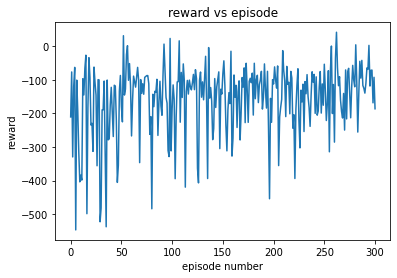

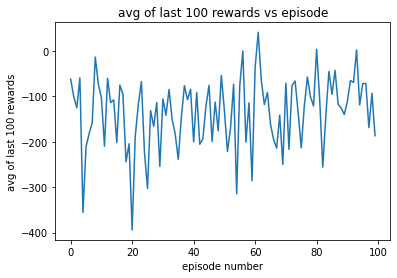

episode 300   ep_reward -186.44876801203574    mean_reward_100 -134.66648817898624
episode 301   ep_reward -111.08674589302603    mean_reward_100 -135.15996269284653
episode 302   ep_reward -32.43444426084922    mean_reward_100 -134.47827417247433
episode 303   ep_reward -92.81519132044973    mean_reward_100 -134.15696861490275
episode 304   ep_reward -112.58470354341532    mean_reward_100 -134.69323975572473
episode 305   ep_reward -110.95066224812881    mean_reward_100 -132.24701998243694
episode 306   ep_reward -249.19553639463751    mean_reward_100 -132.63025977291625
episode 307   ep_reward -112.11582574983238    mean_reward_100 -131.93108965581868
episode 308   ep_reward -106.51896768531769    mean_reward_100 -131.41183030650387
episode 309   ep_reward -81.51256631826435    mean_reward_100 -132.09390238091675
episode 310   ep_reward -232.14002964858918    mean_reward_100 -133.68899491044797
episode 311   ep_reward -263.4208820567698    mean_reward_100 -135.29006092095142
episode 

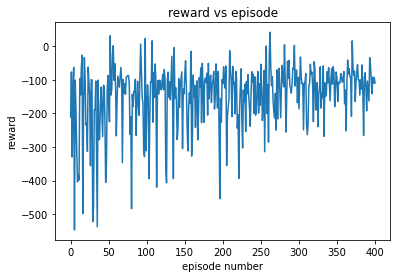

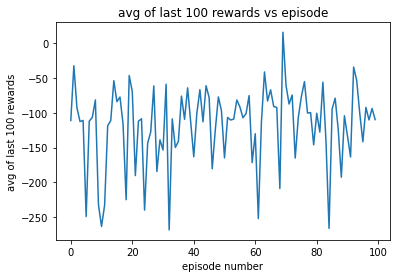

episode 400   ep_reward -109.7876466013354    mean_reward_100 -117.26592891851183
episode 401   ep_reward -51.74168722207521    mean_reward_100 -116.67247833180232
episode 402   ep_reward -55.87217528251667    mean_reward_100 -116.906855642019
episode 403   ep_reward -93.58673727587957    mean_reward_100 -116.91457110157332
episode 404   ep_reward -80.55036234145794    mean_reward_100 -116.59422768955375
episode 405   ep_reward -67.49519762171951    mean_reward_100 -116.15967304328966
episode 406   ep_reward -98.93202671305332    mean_reward_100 -114.65703794647384
episode 407   ep_reward -264.8195155228737    mean_reward_100 -116.1840748442042
episode 408   ep_reward -272.95912314596364    mean_reward_100 -117.84847639881067
episode 409   ep_reward -163.55004529028412    mean_reward_100 -118.66885118853087
episode 410   ep_reward -254.28764404461248    mean_reward_100 -118.89032733249111
episode 411   ep_reward -119.48168910303863    mean_reward_100 -117.45093540295379
episode 412   e

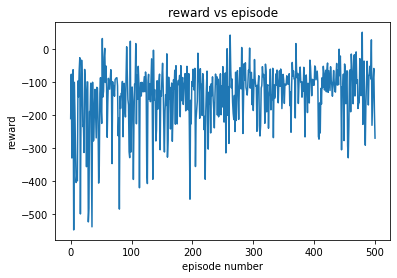

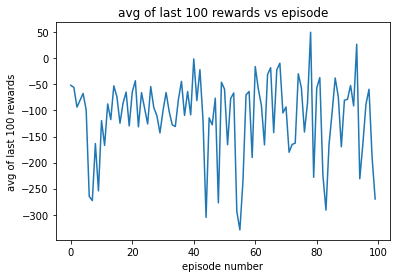

episode 500   ep_reward -269.88829396525773    mean_reward_100 -111.95368550275023
episode 501   ep_reward -109.79964955036513    mean_reward_100 -112.53426512603313
episode 502   ep_reward -74.55962853456943    mean_reward_100 -112.72113965855365
episode 503   ep_reward -123.94732556400831    mean_reward_100 -113.02474554143495
episode 504   ep_reward -100.81414687454307    mean_reward_100 -113.2273833867658
episode 505   ep_reward -64.28754894707616    mean_reward_100 -113.19530690001935
episode 506   ep_reward -118.23525213095738    mean_reward_100 -113.3883391541984
episode 507   ep_reward -109.23730603730696    mean_reward_100 -111.83251705934272
episode 508   ep_reward -88.50985989688635    mean_reward_100 -109.98802442685195
episode 509   ep_reward -144.05921283355332    mean_reward_100 -109.79311610228466
episode 510   ep_reward -152.28057819845043    mean_reward_100 -108.77304544382305
episode 511   ep_reward -69.0765341215177    mean_reward_100 -108.26899389400783
episode 512

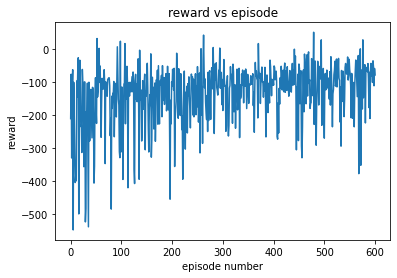

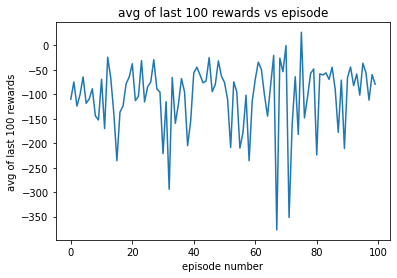

episode 600   ep_reward -79.16523981281506    mean_reward_100 -102.71643834946744
episode 601   ep_reward -92.1949653744342    mean_reward_100 -102.54039150770812
episode 602   ep_reward -9.29304729029748    mean_reward_100 -101.88772569526537
episode 603   ep_reward -42.95083650607348    mean_reward_100 -101.07776080468604
episode 604   ep_reward -43.20624684231842    mean_reward_100 -100.50168180436381
episode 605   ep_reward -42.815771384256024    mean_reward_100 -100.28696402873558
episode 606   ep_reward -90.38434090469062    mean_reward_100 -100.00845491647293
episode 607   ep_reward -42.48242677966813    mean_reward_100 -99.34090612389654
episode 608   ep_reward -131.03096694102584    mean_reward_100 -99.76611719433794
episode 609   ep_reward -59.280257986843665    mean_reward_100 -98.91832764587085
episode 610   ep_reward -62.908815124193765    mean_reward_100 -98.02461001512827
episode 611   ep_reward -63.64436200605085    mean_reward_100 -97.97028829397361
episode 612   ep_re

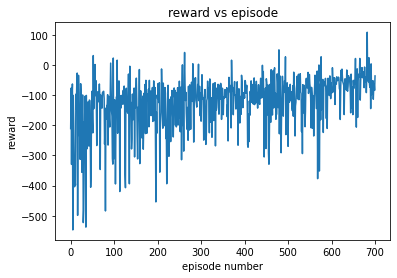

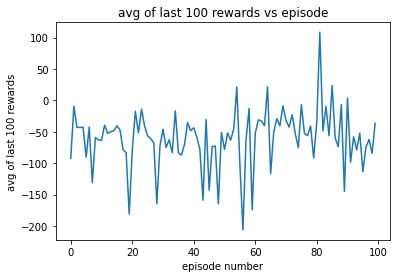

episode 700   ep_reward -36.36756009300636    mean_reward_100 -59.9403718278308
episode 701   ep_reward -200.30670152449974    mean_reward_100 -61.02148918933146
episode 702   ep_reward -59.06753067701292    mean_reward_100 -61.519234023198614
episode 703   ep_reward -110.45723226447893    mean_reward_100 -62.19429798078266
episode 704   ep_reward -64.53656865707237    mean_reward_100 -62.407601198930195
episode 705   ep_reward -14.744903083605763    mean_reward_100 -62.1268925159237
episode 706   ep_reward -25.479677733556557    mean_reward_100 -61.477845884212364
episode 707   ep_reward -41.04774025737254    mean_reward_100 -61.46349901898942
episode 708   ep_reward -18.914826790648377    mean_reward_100 -60.34233761748564
episode 709   ep_reward -31.556642673790265    mean_reward_100 -60.0651014643551
episode 710   ep_reward -59.46401114167965    mean_reward_100 -60.03065342452996
episode 711   ep_reward -24.587086181823736    mean_reward_100 -59.64008066628769
episode 712   ep_rewa

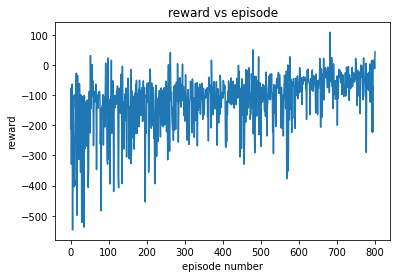

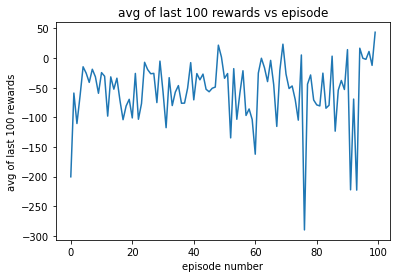

episode 800   ep_reward 43.51099286582419    mean_reward_100 -55.148089542757255
episode 801   ep_reward -58.67233663008024    mean_reward_100 -53.73174589381305
episode 802   ep_reward 18.365613080279743    mean_reward_100 -52.95741445624013
episode 803   ep_reward -49.59456290785121    mean_reward_100 -52.34878776267386
episode 804   ep_reward -36.42546028501019    mean_reward_100 -52.06767667895324
episode 805   ep_reward -59.29016111822175    mean_reward_100 -52.5131292592994
episode 806   ep_reward -40.434281385877554    mean_reward_100 -52.6626752958226
episode 807   ep_reward -65.69235403608002    mean_reward_100 -52.90912143360968
episode 808   ep_reward -15.234278993808786    mean_reward_100 -52.87231595564128
episode 809   ep_reward -62.20537021584366    mean_reward_100 -53.17880323106181
episode 810   ep_reward -51.82614778396163    mean_reward_100 -53.102424597484635
episode 811   ep_reward -88.2470515465424    mean_reward_100 -53.739024251131816
episode 812   ep_reward -85

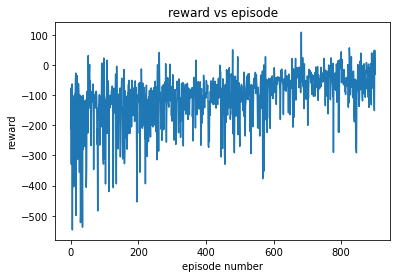

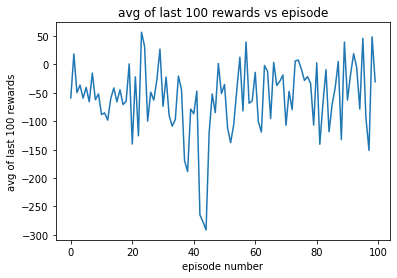

episode 900   ep_reward -30.481279552097703    mean_reward_100 -59.145739105846005
episode 901   ep_reward -10.255814230594268    mean_reward_100 -58.66157388185115
episode 902   ep_reward -31.939187706355426    mean_reward_100 -59.1646218897175
episode 903   ep_reward -15.486359083495685    mean_reward_100 -58.82353985147395
episode 904   ep_reward -176.5273577546727    mean_reward_100 -60.22455882617057
episode 905   ep_reward -123.5188997050436    mean_reward_100 -60.86684621203879
episode 906   ep_reward -67.91437710094986    mean_reward_100 -61.14164716918951
episode 907   ep_reward -76.34796515744608    mean_reward_100 -61.248203280403175
episode 908   ep_reward -97.0894676200165    mean_reward_100 -62.06675516666526
episode 909   ep_reward -42.67261461915862    mean_reward_100 -61.87142761069841
episode 910   ep_reward -19.598502973911792    mean_reward_100 -61.549151162597916
episode 911   ep_reward -32.35355350815294    mean_reward_100 -60.99021618221402
episode 912   ep_rewar

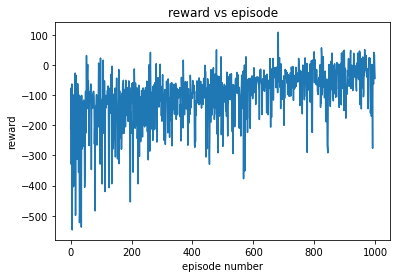

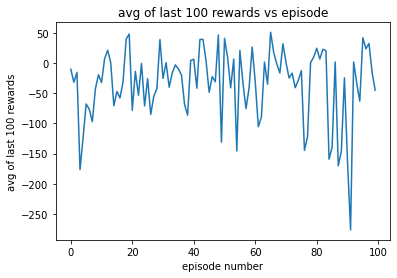

episode 1000   ep_reward -44.84410415044333    mean_reward_100 -34.288420292896994
episode 1001   ep_reward 34.339446450240644    mean_reward_100 -33.842467686088646
episode 1002   ep_reward 9.755283326495821    mean_reward_100 -33.42552297576013
episode 1003   ep_reward -123.66783533857816    mean_reward_100 -34.50733773831096
episode 1004   ep_reward 25.634861661529627    mean_reward_100 -32.48571554414893
episode 1005   ep_reward -9.081089426714072    mean_reward_100 -31.34133744136564
episode 1006   ep_reward 15.666603107206683    mean_reward_100 -30.50552763928407
episode 1007   ep_reward -21.613803072284654    mean_reward_100 -29.958186018432453
episode 1008   ep_reward -61.17997955326126    mean_reward_100 -29.599091137764905
episode 1009   ep_reward 5.673428407240394    mean_reward_100 -29.11563070750091
episode 1010   ep_reward -8.312895927532054    mean_reward_100 -29.00277463703711
episode 1011   ep_reward -76.97415403536161    mean_reward_100 -29.4489806423092
episode 1012 

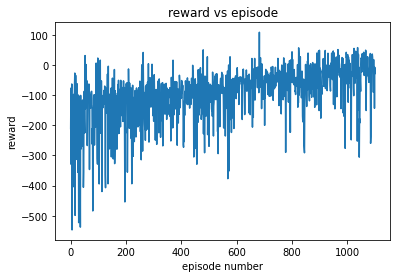

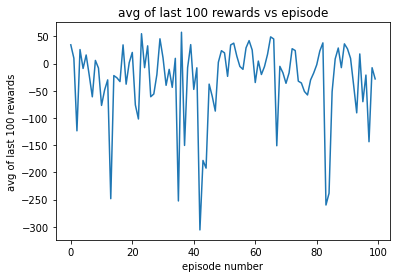

episode 1100   ep_reward -28.31150249124053    mean_reward_100 -30.3437704394262
episode 1101   ep_reward 10.966251303250138    mean_reward_100 -30.57750239089611
episode 1102   ep_reward -5.726924263495192    mean_reward_100 -30.732324466796022
episode 1103   ep_reward -15.64007065005754    mean_reward_100 -29.65204681991082
episode 1104   ep_reward 34.13765216123856    mean_reward_100 -29.567018914913728
episode 1105   ep_reward 35.76913027332265    mean_reward_100 -29.11851671791336
episode 1106   ep_reward 5.287173190668511    mean_reward_100 -29.22231101707874
episode 1107   ep_reward -110.29385229363214    mean_reward_100 -30.109111509292205
episode 1108   ep_reward 34.58433419030109    mean_reward_100 -29.15146837185659
episode 1109   ep_reward 12.72132559057691    mean_reward_100 -29.080989400023228
episode 1110   ep_reward 55.63269088553267    mean_reward_100 -28.44153353189258
episode 1111   ep_reward -26.41255816481126    mean_reward_100 -27.935917573187076
episode 1112   ep

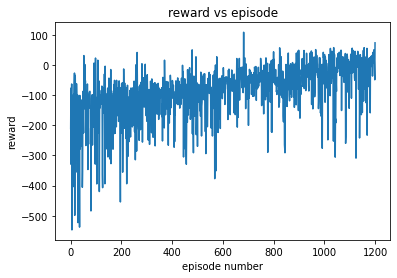

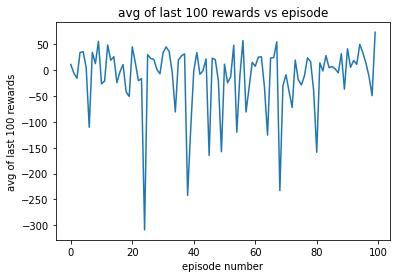

episode 1200   ep_reward 73.36692737919678    mean_reward_100 -12.236536143604813
episode 1201   ep_reward -10.909840431058104    mean_reward_100 -12.455297060947894
episode 1202   ep_reward 23.723781390188464    mean_reward_100 -12.160790004411059
episode 1203   ep_reward -8.849154622344642    mean_reward_100 -12.092880844133928
episode 1204   ep_reward -10.408375900348346    mean_reward_100 -12.538341124749799
episode 1205   ep_reward 21.475530970681465    mean_reward_100 -12.68127711777621
episode 1206   ep_reward 42.564605146611626    mean_reward_100 -12.308502798216777
episode 1207   ep_reward -23.20006080355865    mean_reward_100 -11.437564883316043
episode 1208   ep_reward 24.826551740546876    mean_reward_100 -11.535142707813586
episode 1209   ep_reward -5.066239506822572    mean_reward_100 -11.713018358787581
episode 1210   ep_reward 43.76499537399144    mean_reward_100 -11.831695313902994
episode 1211   ep_reward 42.9663685205835    mean_reward_100 -11.137906047049047
episode

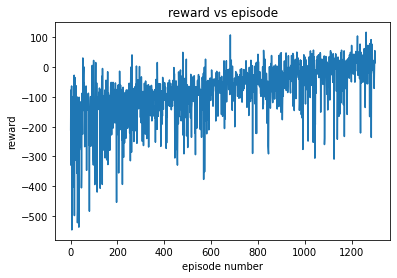

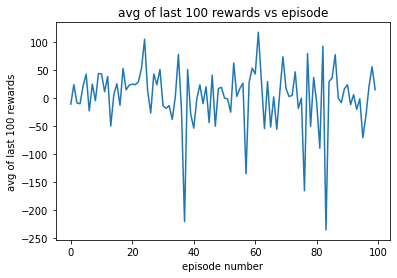

episode 1300   ep_reward 14.835562494840005    mean_reward_100 3.373819128621936
episode 1301   ep_reward 22.978246184413123    mean_reward_100 3.7126999947766484
episode 1302   ep_reward -1.0643395885243763    mean_reward_100 3.46481878498952
episode 1303   ep_reward -176.38209967482877    mean_reward_100 1.789489334464678
episode 1304   ep_reward -14.680505455532895    mean_reward_100 1.7467680389128322
episode 1305   ep_reward 27.86207005444534    mean_reward_100 1.8106334297504707
episode 1306   ep_reward -149.36365815920834    mean_reward_100 -0.1086492033077286
episode 1307   ep_reward -36.4697630372676    mean_reward_100 -0.24134622564481759
episode 1308   ep_reward 2.0907547235867696    mean_reward_100 -0.46870419581441836
episode 1309   ep_reward -51.7348605168616    mean_reward_100 -0.9353904059148087
episode 1310   ep_reward 58.64480961288951    mean_reward_100 -0.7865922635258287
episode 1311   ep_reward 76.5952950778269    mean_reward_100 -0.450302997953394
episode 1312   

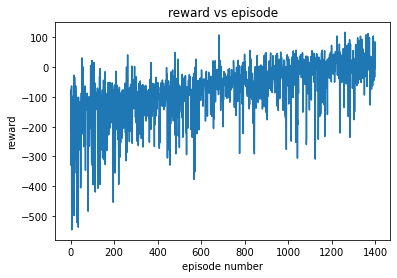

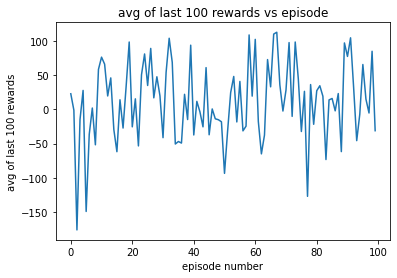

episode 1400   ep_reward -31.100521692902603    mean_reward_100 11.790429182243736
episode 1401   ep_reward -26.87167598808493    mean_reward_100 11.291929960518752
episode 1402   ep_reward -16.053571694259773    mean_reward_100 11.1420376394614
episode 1403   ep_reward 32.3983683944505    mean_reward_100 13.229842320154194
episode 1404   ep_reward 18.1633102189161    mean_reward_100 13.558280476898688
episode 1405   ep_reward 1.1073608416988918    mean_reward_100 13.290733384771222
episode 1406   ep_reward 68.56882189356237    mean_reward_100 15.470058185298932
episode 1407   ep_reward -57.51935422360492    mean_reward_100 15.259562273435556
episode 1408   ep_reward 13.143598794375222    mean_reward_100 15.37009071414344
episode 1409   ep_reward -71.47475405150237    mean_reward_100 15.172691778797034
episode 1410   ep_reward 47.158290428621115    mean_reward_100 15.057826586954347
episode 1411   ep_reward -20.901024946790784    mean_reward_100 14.082863386708171
episode 1412   ep_rew

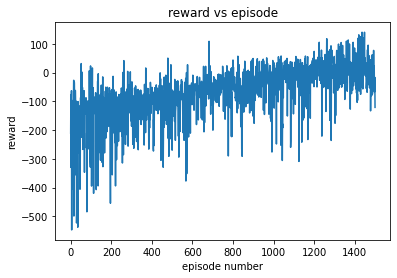

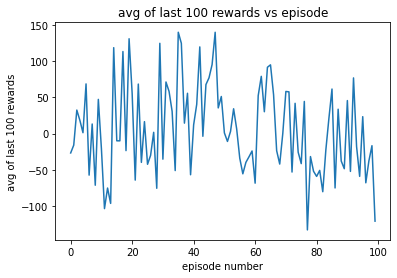

episode 1500   ep_reward -121.13641370889171    mean_reward_100 5.216741959016621
episode 1501   ep_reward 222.6749335716509    mean_reward_100 7.7122080546139795
episode 1502   ep_reward -50.164173612672144    mean_reward_100 7.371102035429856
episode 1503   ep_reward -148.8195361963215    mean_reward_100 5.558922989522136
episode 1504   ep_reward -80.09717723806547    mean_reward_100 4.57631811495232
episode 1505   ep_reward -64.93896948028717    mean_reward_100 3.91585481173246
episode 1506   ep_reward -73.66525219934442    mean_reward_100 2.493514070803391
episode 1507   ep_reward -98.68907929097944    mean_reward_100 2.0818168201296463
episode 1508   ep_reward 17.733121315214845    mean_reward_100 2.127712045338043
episode 1509   ep_reward 5.185026119956987    mean_reward_100 2.8943098470526354
episode 1510   ep_reward -130.01555967533784    mean_reward_100 1.1225713460130464
episode 1511   ep_reward -70.77650785610336    mean_reward_100 0.6238165169199209
episode 1512   ep_reward

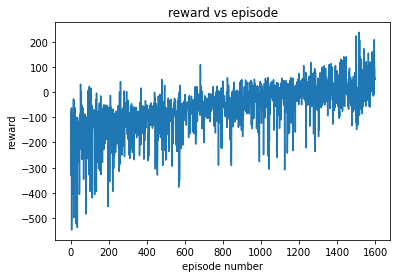

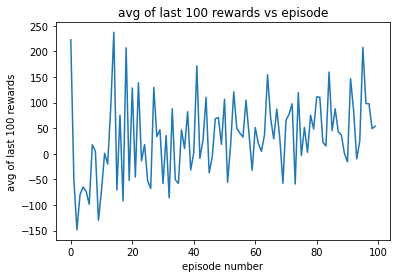

episode 1600   ep_reward 53.69354275861997    mean_reward_100 33.01837582664546
episode 1601   ep_reward 120.21711660711524    mean_reward_100 31.9937976570001
episode 1602   ep_reward 44.207116893302924    mean_reward_100 32.93751056205985
episode 1603   ep_reward 39.744905730331965    mean_reward_100 34.82315498132639
episode 1604   ep_reward 64.70598940641625    mean_reward_100 36.2711866477712
episode 1605   ep_reward 46.008547826856976    mean_reward_100 37.38066182084265
episode 1606   ep_reward 120.15356114095484    mean_reward_100 39.31884995424564
episode 1607   ep_reward 126.5141081204304    mean_reward_100 41.570881828359745
episode 1608   ep_reward 117.86998099818153    mean_reward_100 42.5722504251894
episode 1609   ep_reward 140.47642868488768    mean_reward_100 43.92516445083871
episode 1610   ep_reward -30.41001468928893    mean_reward_100 44.9212199006992
episode 1611   ep_reward 139.20218052980096    mean_reward_100 47.021006784558246
episode 1612   ep_reward -27.8162

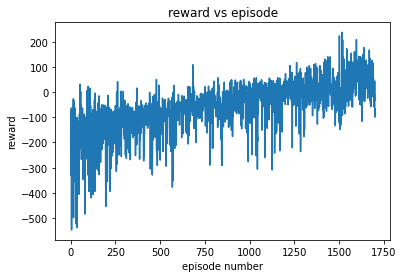

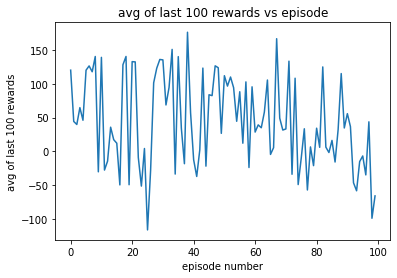

episode 1700   ep_reward -66.08646313837124    mean_reward_100 43.977181136340256
episode 1701   ep_reward 46.774040258999634    mean_reward_100 43.242750372859106
episode 1702   ep_reward 20.051868417304178    mean_reward_100 43.001197888099114
episode 1703   ep_reward 9.821618820210446    mean_reward_100 42.701965018997896
episode 1704   ep_reward 27.049284462666833    mean_reward_100 42.325397969560406
episode 1705   ep_reward -38.06556290952621    mean_reward_100 41.48465686219658
episode 1706   ep_reward 26.58752266768238    mean_reward_100 40.54899647746385
episode 1707   ep_reward -65.35261640866614    mean_reward_100 38.63032923217289
episode 1708   ep_reward 119.24066002837769    mean_reward_100 38.64403602247485
episode 1709   ep_reward 143.45335026170358    mean_reward_100 38.673805238243006
episode 1710   ep_reward 3.5052931575232265    mean_reward_100 39.01295831671113
episode 1711   ep_reward 79.20025160017182    mean_reward_100 38.412939027414836
episode 1712   ep_reward

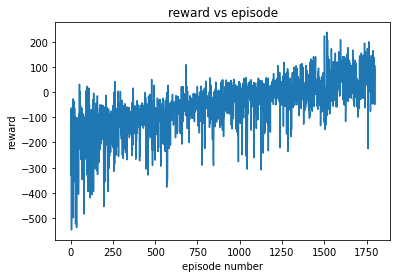

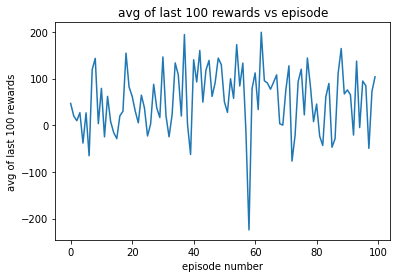

episode 1800   ep_reward 103.8581427612819    mean_reward_100 54.83793704198836
episode 1801   ep_reward 77.94438426648601    mean_reward_100 55.14964048206321
episode 1802   ep_reward 121.42830698093326    mean_reward_100 56.16340486769951
episode 1803   ep_reward 115.07880303993304    mean_reward_100 57.21597670989672
episode 1804   ep_reward 143.37818174694593    mean_reward_100 58.379265682739515
episode 1805   ep_reward 146.2393450973194    mean_reward_100 60.22231476280798
episode 1806   ep_reward 127.70996523386152    mean_reward_100 61.23353918846977
episode 1807   ep_reward 136.57453056913758    mean_reward_100 63.25281065824781
episode 1808   ep_reward 114.6298388651985    mean_reward_100 63.20670244661602
episode 1809   ep_reward 152.4690136381262    mean_reward_100 63.296859080380244
episode 1810   ep_reward 75.79501172642728    mean_reward_100 64.01975626606928
episode 1811   ep_reward 131.58180393804327    mean_reward_100 64.54357178944798
episode 1812   ep_reward -12.092

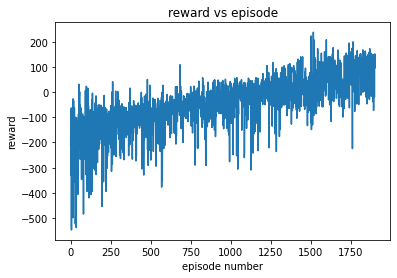

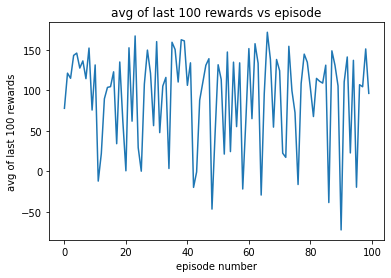

episode 1900   ep_reward 96.42739801361886    mean_reward_100 92.29271976699154
episode 1901   ep_reward 91.11850170304731    mean_reward_100 92.42446094135715
episode 1902   ep_reward -144.6816280478924    mean_reward_100 89.7633615910689
episode 1903   ep_reward 122.79228534821353    mean_reward_100 89.84049641415172
episode 1904   ep_reward 118.54787944496687    mean_reward_100 89.59219339113191
episode 1905   ep_reward 125.89582213938583    mean_reward_100 89.38875816155257
episode 1906   ep_reward 93.93173051148449    mean_reward_100 89.0509758143288
episode 1907   ep_reward 115.21470117847821    mean_reward_100 88.8373775204222
episode 1908   ep_reward 85.15918014461785    mean_reward_100 88.5426709332164
episode 1909   ep_reward 114.07033514920526    mean_reward_100 88.15868414832717
episode 1910   ep_reward 74.76379349143303    mean_reward_100 88.14837196597723
episode 1911   ep_reward 136.76927798566444    mean_reward_100 88.20024670645346
episode 1912   ep_reward 84.346267206

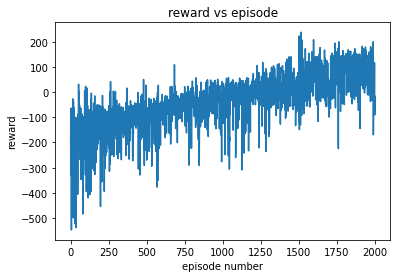

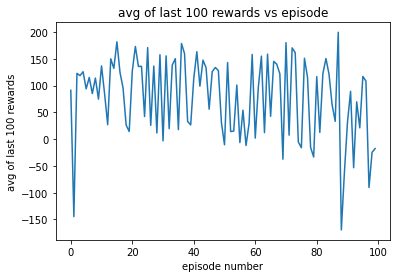

episode 2000   ep_reward -17.511135593227976    mean_reward_100 77.7258584552119
episode 2001   ep_reward 180.80797982735413    mean_reward_100 78.62275323645497
episode 2002   ep_reward 74.8240425578367    mean_reward_100 80.81780994251226
episode 2003   ep_reward -93.20262742581359    mean_reward_100 78.65786081477201
episode 2004   ep_reward -22.880138768690003    mean_reward_100 77.24358063263543
episode 2005   ep_reward 109.6566604903958    mean_reward_100 77.08118901614553
episode 2006   ep_reward 63.318431909174905    mean_reward_100 76.77505603012243
episode 2007   ep_reward 122.13441783590913    mean_reward_100 76.84425319669674
episode 2008   ep_reward -46.9720032383962    mean_reward_100 75.5229413628666
episode 2009   ep_reward 61.65390386101633    mean_reward_100 74.99877704998471
episode 2010   ep_reward 52.81945937026994    mean_reward_100 74.77933370877308
episode 2011   ep_reward 35.30240552714595    mean_reward_100 73.76466498418789
episode 2012   ep_reward 54.0924405

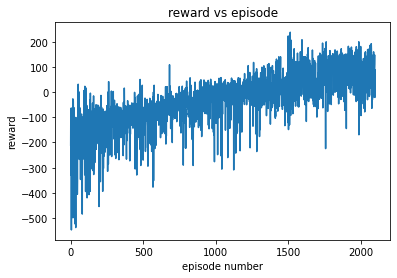

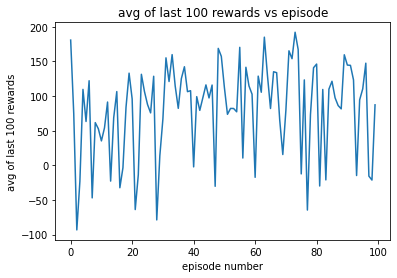

episode 2100   ep_reward 87.34278382858277    mean_reward_100 81.92411226698654
episode 2101   ep_reward -121.90309451645867    mean_reward_100 78.89700152354841
episode 2102   ep_reward 108.64166962352063    mean_reward_100 79.23517779420524
episode 2103   ep_reward 59.79047717487967    mean_reward_100 80.76510884021219
episode 2104   ep_reward 67.94478714961167    mean_reward_100 81.67335809939522
episode 2105   ep_reward 2.092962567473066    mean_reward_100 80.59772112016599
episode 2106   ep_reward -44.78004030535753    mean_reward_100 79.51673639802065
episode 2107   ep_reward -161.20781881401203    mean_reward_100 76.68331403152143
episode 2108   ep_reward 103.80407637491385    mean_reward_100 78.19107482765453
episode 2109   ep_reward 90.12036649375791    mean_reward_100 78.47573945398194
episode 2110   ep_reward 127.80327023959312    mean_reward_100 79.22557756267518
episode 2111   ep_reward 47.54643830819552    mean_reward_100 79.34801789048566
episode 2112   ep_reward 53.8535

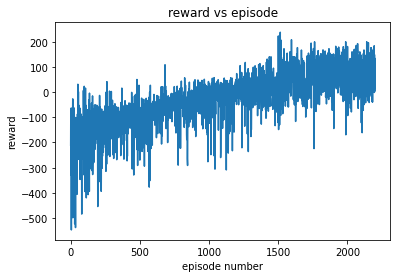

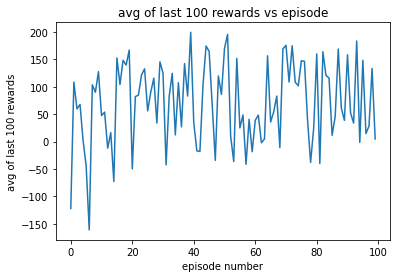

episode 2200   ep_reward 4.880160045169092    mean_reward_100 70.57083369251546
episode 2201   ep_reward -38.24918377172571    mean_reward_100 71.4073727999628
episode 2202   ep_reward 122.78714178231019    mean_reward_100 71.54882752155068
episode 2203   ep_reward 130.99519013971334    mean_reward_100 72.26087465119902
episode 2204   ep_reward 158.58662706546687    mean_reward_100 73.16729305035757
episode 2205   ep_reward -10.194669948808055    mean_reward_100 73.04441672519476
episode 2206   ep_reward 12.30930636329019    mean_reward_100 73.61531019188125
episode 2207   ep_reward 139.57702204392456    mean_reward_100 76.62315860046061
episode 2208   ep_reward 39.725786836133125    mean_reward_100 75.9823757050728
episode 2209   ep_reward 25.420349843058517    mean_reward_100 75.33537553856581
episode 2210   ep_reward 122.19766305346023    mean_reward_100 75.27931946670448
episode 2211   ep_reward 150.3278412046095    mean_reward_100 76.30713349566861
episode 2212   ep_reward 22.1058

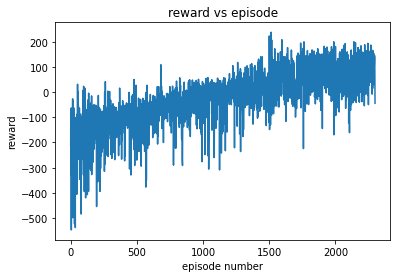

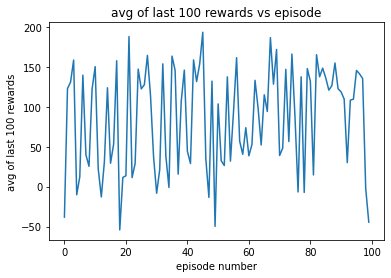

episode 2300   ep_reward -44.527407940054744    mean_reward_100 85.22105435085652
episode 2301   ep_reward 134.72561375885385    mean_reward_100 86.9508023261623
episode 2302   ep_reward 135.60648007868468    mean_reward_100 87.07899570912605
episode 2303   ep_reward 111.9358903762396    mean_reward_100 86.88840271149131
episode 2304   ep_reward 149.91096861064497    mean_reward_100 86.80164612694313
episode 2305   ep_reward 116.01572702248048    mean_reward_100 88.06375009665601
episode 2306   ep_reward 134.928801339577    mean_reward_100 89.28994504641886
episode 2307   ep_reward 140.1596007776367    mean_reward_100 89.29577083375598
episode 2308   ep_reward 140.92415679394577    mean_reward_100 90.30775453333412
episode 2309   ep_reward 12.846018571049385    mean_reward_100 90.182011220614
episode 2310   ep_reward 139.01971082129555    mean_reward_100 90.35023169829239
episode 2311   ep_reward 97.50383840682345    mean_reward_100 89.8219916703145
episode 2312   ep_reward 116.1319491

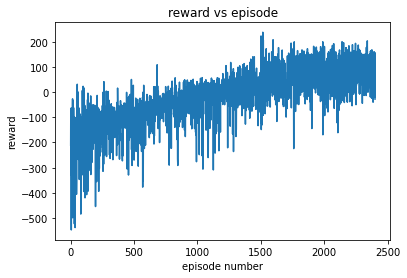

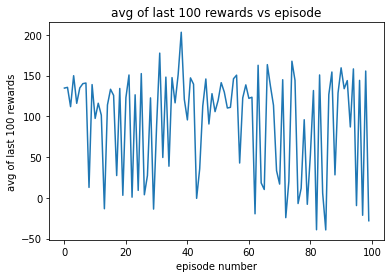

episode 2400   ep_reward -28.048595021832725    mean_reward_100 92.68605683539305
episode 2401   ep_reward 135.2272918176243    mean_reward_100 92.69107361598073
episode 2402   ep_reward 150.1092757587905    mean_reward_100 92.83610157278177
episode 2403   ep_reward 175.21679542839053    mean_reward_100 93.46891062330329
episode 2404   ep_reward 96.81059377460376    mean_reward_100 92.9379068749429
episode 2405   ep_reward 126.55358375144054    mean_reward_100 93.04328544223249
episode 2406   ep_reward 128.81526444934815    mean_reward_100 92.98215007333022
episode 2407   ep_reward 45.147940575302286    mean_reward_100 92.03203347130685
episode 2408   ep_reward 40.1534005140479    mean_reward_100 91.02432590850788
episode 2409   ep_reward 75.0144397604708    mean_reward_100 91.6460101204021
episode 2410   ep_reward 107.84919359886665    mean_reward_100 91.33430494817782
episode 2411   ep_reward 156.3826613792594    mean_reward_100 91.92309317790216
episode 2412   ep_reward 157.43355090

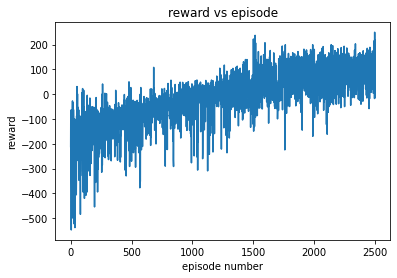

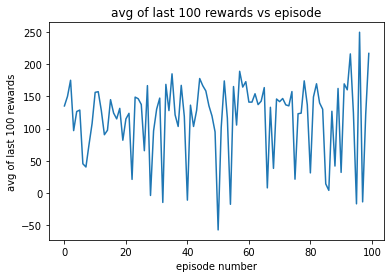

episode 2500   ep_reward 217.00840953732998    mean_reward_100 116.36914187722486
episode 2501   ep_reward 135.77174239370956    mean_reward_100 116.37458638298574
episode 2502   ep_reward 15.363213166267272    mean_reward_100 115.02712575706052
episode 2503   ep_reward 218.7421549548302    mean_reward_100 115.46237935232492
episode 2504   ep_reward 144.66856944270177    mean_reward_100 115.9409591090059
episode 2505   ep_reward 47.42185004390225    mean_reward_100 115.14964177193049
episode 2506   ep_reward -25.25832042616696    mean_reward_100 113.60890592317537
episode 2507   ep_reward 144.99548447166123    mean_reward_100 114.60738136213894
episode 2508   ep_reward 118.09950373483088    mean_reward_100 115.38684239434679
episode 2509   ep_reward 132.28278202204027    mean_reward_100 115.95952581696247
episode 2510   ep_reward 12.027058247185892    mean_reward_100 115.00130446344566
episode 2511   ep_reward -39.16750951859288    mean_reward_100 113.04580275446715
episode 2512   ep_r

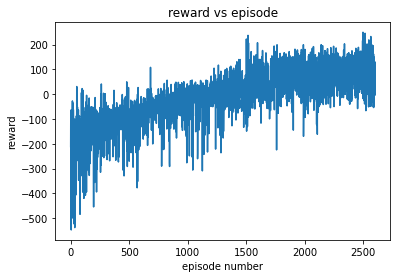

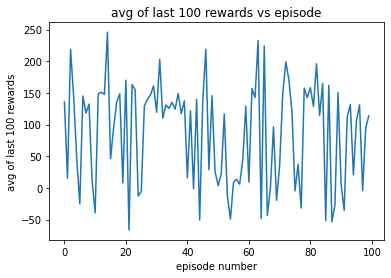

episode 2600   ep_reward 113.76988127992605    mean_reward_100 87.72011646179408
episode 2601   ep_reward 35.51445437614885    mean_reward_100 86.71754358161849
episode 2602   ep_reward 83.2537525213479    mean_reward_100 87.39644897516929
episode 2603   ep_reward 76.59455175093383    mean_reward_100 85.97497294313034
episode 2604   ep_reward 136.11730370536515    mean_reward_100 85.88946028575695
episode 2605   ep_reward 128.15321291822326    mean_reward_100 86.69677391450017
episode 2606   ep_reward 170.42879171055816    mean_reward_100 88.65364503586741
episode 2607   ep_reward 133.38539294276364    mean_reward_100 88.53754412057845
episode 2608   ep_reward 110.86521279924868    mean_reward_100 88.4652012112226
episode 2609   ep_reward 105.82806417261482    mean_reward_100 88.20065403272834
episode 2610   ep_reward -19.201705720390827    mean_reward_100 87.8883663930526
episode 2611   ep_reward 115.55708727464044    mean_reward_100 89.43561236098492
episode 2612   ep_reward 226.5389

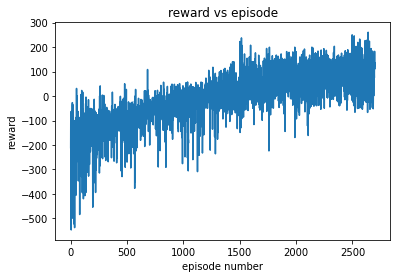

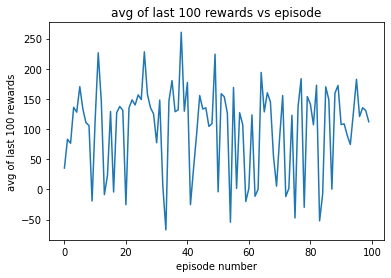

episode 2700   ep_reward 112.26328722532575    mean_reward_100 101.46595622896356
episode 2701   ep_reward 88.41295128858016    mean_reward_100 101.99494119808786
episode 2702   ep_reward 159.2853779366754    mean_reward_100 102.75525745224115
episode 2703   ep_reward 106.47089138446437    mean_reward_100 103.05402084857644
episode 2704   ep_reward 143.62683287608667    mean_reward_100 103.12911614028367
episode 2705   ep_reward 236.33351598484307    mean_reward_100 104.21091917094988
episode 2706   ep_reward 216.5458573548308    mean_reward_100 104.6720898273926
episode 2707   ep_reward 124.05731512522148    mean_reward_100 104.57880904921718
episode 2708   ep_reward -0.06584631055541479    mean_reward_100 103.46949845811912
episode 2709   ep_reward 120.42870564312372    mean_reward_100 103.61550487282422
episode 2710   ep_reward -27.04074139217842    mean_reward_100 103.53711451610634
episode 2711   ep_reward 155.52865454401655    mean_reward_100 103.93683018880009
episode 2712   ep_

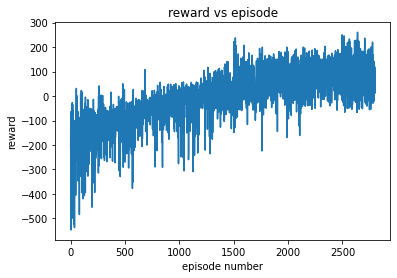

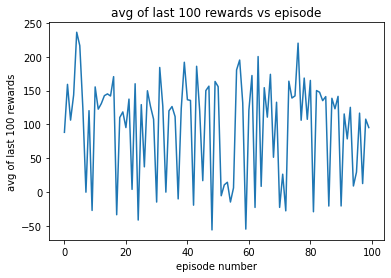

episode 2800   ep_reward 95.45177698363524    mean_reward_100 97.44613090995252
episode 2801   ep_reward 156.77598788856355    mean_reward_100 98.12976127595235
episode 2802   ep_reward 121.04897466767991    mean_reward_100 97.74739724326238
episode 2803   ep_reward 85.84797369728754    mean_reward_100 97.54116806639063
episode 2804   ep_reward 226.06250235179508    mean_reward_100 98.36552476114771
episode 2805   ep_reward 33.06059844237413    mean_reward_100 96.33279558572303
episode 2806   ep_reward 154.8668963086853    mean_reward_100 95.71600597526158
episode 2807   ep_reward 115.45980717481233    mean_reward_100 95.6300308957575
episode 2808   ep_reward 132.30323336577786    mean_reward_100 96.95372169252082
episode 2809   ep_reward 143.8980774242468    mean_reward_100 97.18841541033204
episode 2810   ep_reward 135.26594276613585    mean_reward_100 98.81148225191517
episode 2811   ep_reward 122.04558582289182    mean_reward_100 98.47665156470396
episode 2812   ep_reward 140.81979

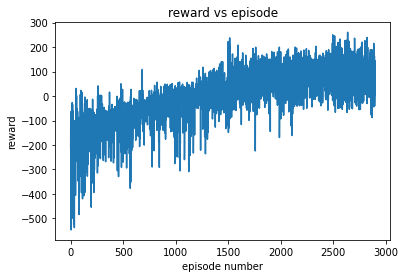

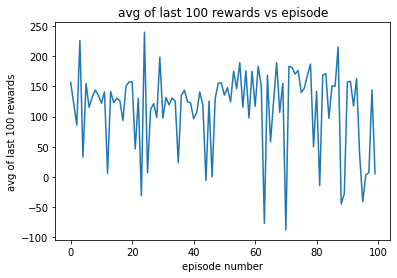

episode 2900   ep_reward 5.587596957517334    mean_reward_100 114.88544528417837
episode 2901   ep_reward -3.1378944197389416    mean_reward_100 113.28630646109534
episode 2902   ep_reward 167.56048501574853    mean_reward_100 113.75142156457603
episode 2903   ep_reward 155.4137660763096    mean_reward_100 114.44707948836621
episode 2904   ep_reward 11.599273579389603    mean_reward_100 112.30244720064218
episode 2905   ep_reward 53.59434161644492    mean_reward_100 112.50778463238288
episode 2906   ep_reward 19.99711215578921    mean_reward_100 111.15908679085392
episode 2907   ep_reward 3.3315733607963978    mean_reward_100 110.03780445271376
episode 2908   ep_reward 163.91256218269126    mean_reward_100 110.3538977408829
episode 2909   ep_reward 143.02913261933267    mean_reward_100 110.34520829283376
episode 2910   ep_reward 134.05808091649524    mean_reward_100 110.33312967433734
episode 2911   ep_reward 151.19225735188166    mean_reward_100 110.62459638962726
episode 2912   ep_re

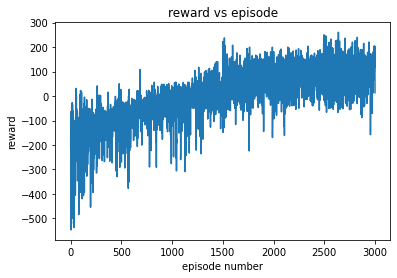

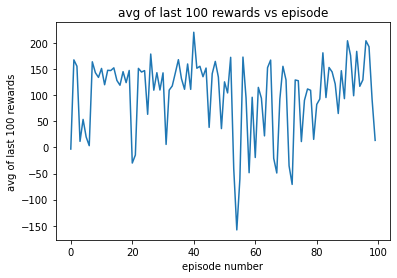

episode 3000   ep_reward 13.496668504273288    mean_reward_100 101.36997722441292
episode 3001   ep_reward 155.51607361912244    mean_reward_100 102.95651690480153
episode 3002   ep_reward 105.13337975887063    mean_reward_100 102.33224585223276
episode 3003   ep_reward 105.45838630372381    mean_reward_100 101.8326920545069
episode 3004   ep_reward -14.215946997633353    mean_reward_100 101.57453984873666
episode 3005   ep_reward 219.60028417814692    mean_reward_100 103.2345992743537
episode 3006   ep_reward 143.16594485651464    mean_reward_100 104.46628760136095
episode 3007   ep_reward 27.831415857794482    mean_reward_100 104.71128602633091
episode 3008   ep_reward 9.42961200545281    mean_reward_100 103.16645652455854
episode 3009   ep_reward 135.4251741488893    mean_reward_100 103.09041693985414
episode 3010   ep_reward 153.632653996549    mean_reward_100 103.28616267065465
episode 3011   ep_reward 151.56092553419435    mean_reward_100 103.28984935247777
episode 3012   ep_rewa

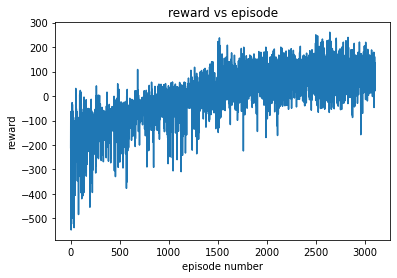

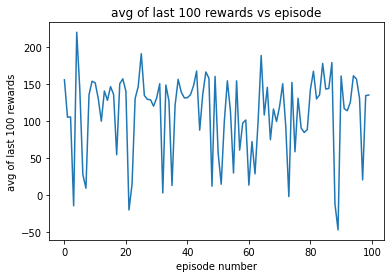

episode 3100   ep_reward 134.96269579471704    mean_reward_100 110.77784198104817
episode 3101   ep_reward 139.17582580218192    mean_reward_100 110.61443950287878
episode 3102   ep_reward 124.70370946911933    mean_reward_100 110.81014279998126
episode 3103   ep_reward 131.78402652984832    mean_reward_100 111.07339920224253
episode 3104   ep_reward 117.74200105460767    mean_reward_100 112.39297868276493
episode 3105   ep_reward 98.63573895880786    mean_reward_100 111.18333323057155
episode 3106   ep_reward 16.736181106557808    mean_reward_100 109.91903559307201
episode 3107   ep_reward 141.15097640257022    mean_reward_100 111.05223119851975
episode 3108   ep_reward 80.80907678867139    mean_reward_100 111.76602584635191
episode 3109   ep_reward 110.59789133697222    mean_reward_100 111.51775301823277
episode 3110   ep_reward 113.99595214793406    mean_reward_100 111.1213859997466
episode 3111   ep_reward 110.97785657077817    mean_reward_100 110.71555531011245
episode 3112   ep_r

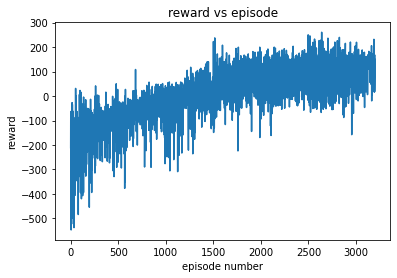

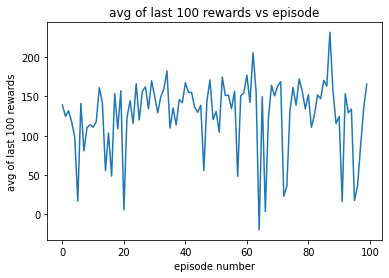

episode 3200   ep_reward 165.73954941026057    mean_reward_100 127.50915365073361
episode 3201   ep_reward 127.78585130401346    mean_reward_100 127.39525390575194
episode 3202   ep_reward 156.70300804078104    mean_reward_100 127.71524689146855
episode 3203   ep_reward 159.0581963417156    mean_reward_100 127.98798858958725
episode 3204   ep_reward 162.67488491559493    mean_reward_100 128.4373174281971
episode 3205   ep_reward 153.74584601068432    mean_reward_100 128.98841849871587
episode 3206   ep_reward 134.48186334350467    mean_reward_100 130.16587532108534
episode 3207   ep_reward 142.93554796031088    mean_reward_100 130.18372103666275
episode 3208   ep_reward 121.0414323967654    mean_reward_100 130.58604459274366
episode 3209   ep_reward 159.35396299845596    mean_reward_100 131.0736053093585
episode 3210   ep_reward 120.91810484281243    mean_reward_100 131.1428268363073
episode 3211   ep_reward 132.49783345225808    mean_reward_100 131.3580266051221
episode 3212   ep_rewa

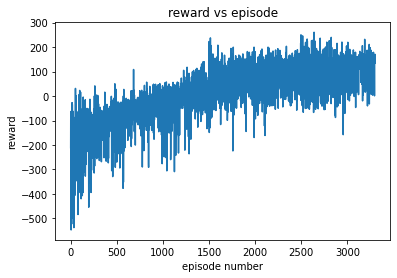

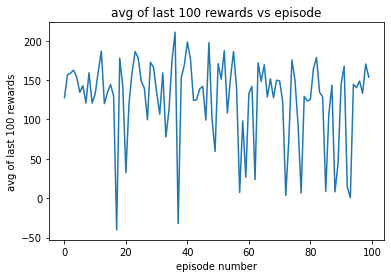

episode 3300   ep_reward 153.8404392913969    mean_reward_100 126.2342932205492
episode 3301   ep_reward 130.1855816416759    mean_reward_100 126.25829052392581
episode 3302   ep_reward 142.75917646242888    mean_reward_100 126.1188522081423
episode 3303   ep_reward 162.83518284417337    mean_reward_100 126.15662207316687
episode 3304   ep_reward 137.9787847132174    mean_reward_100 125.9096610711431
episode 3305   ep_reward 157.0404607206257    mean_reward_100 125.94260721824251
episode 3306   ep_reward 138.701277608555    mean_reward_100 125.98480136089303
episode 3307   ep_reward 152.12548323105554    mean_reward_100 126.07670071360047
episode 3308   ep_reward 19.17585497455876    mean_reward_100 125.05804493937839
episode 3309   ep_reward 148.91371310808628    mean_reward_100 124.95364244047472
episode 3310   ep_reward 167.23804695859656    mean_reward_100 125.41684186163256
episode 3311   ep_reward 113.88755301665728    mean_reward_100 125.23073905727655
episode 3312   ep_reward 2

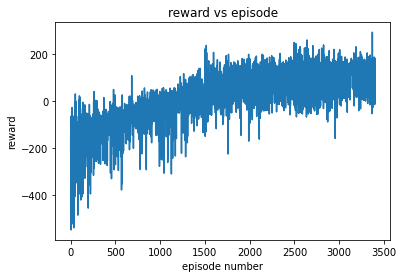

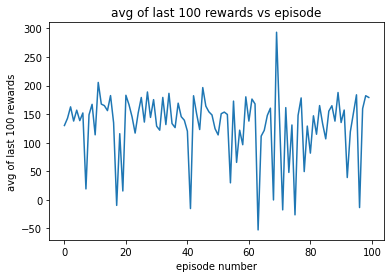

episode 3400   ep_reward 179.2703588649947    mean_reward_100 131.3286606494416
episode 3401   ep_reward 167.124269583369    mean_reward_100 131.69804752885855
episode 3402   ep_reward 125.70393421047496    mean_reward_100 131.527495106339
episode 3403   ep_reward 34.6413595239614    mean_reward_100 130.24555687313688
episode 3404   ep_reward 11.223296210443806    mean_reward_100 128.97800198810913
episode 3405   ep_reward 178.0726156137933    mean_reward_100 129.18832353704082
episode 3406   ep_reward 149.2845416744814    mean_reward_100 129.29415617770007
episode 3407   ep_reward 60.38518091878262    mean_reward_100 128.37675315457736
episode 3408   ep_reward 141.77519667742678    mean_reward_100 129.60274657160602
episode 3409   ep_reward 154.9939952473965    mean_reward_100 129.66354939299913
episode 3410   ep_reward -9.547255136081858    mean_reward_100 127.89569637205233
episode 3411   ep_reward 96.26578952563769    mean_reward_100 127.71947873714214
episode 3412   ep_reward 150.

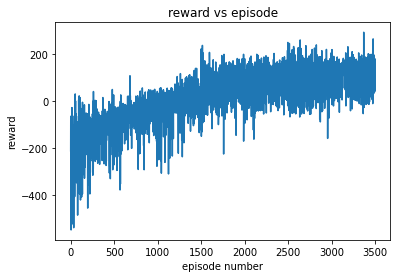

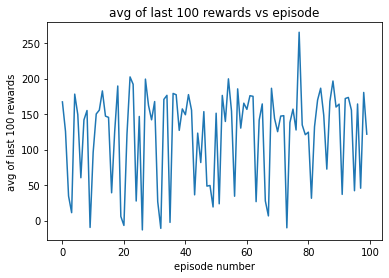

episode 3500   ep_reward 121.70668182864159    mean_reward_100 121.5065114339127
episode 3501   ep_reward 139.1212422015271    mean_reward_100 121.2264811600943
episode 3502   ep_reward 181.89606316214355    mean_reward_100 121.78840244961098
episode 3503   ep_reward 149.0923952253272    mean_reward_100 122.93291280662464
episode 3504   ep_reward 109.89875368148448    mean_reward_100 123.91966738133505
episode 3505   ep_reward 34.360918731480155    mean_reward_100 122.4825504125119
episode 3506   ep_reward 32.96392635566406    mean_reward_100 121.31934425932373
episode 3507   ep_reward 132.2843862515362    mean_reward_100 122.03833631265128
episode 3508   ep_reward 138.412107044644    mean_reward_100 122.00470541632347
episode 3509   ep_reward 39.3525643388532    mean_reward_100 120.84829110723803
episode 3510   ep_reward 168.66709483045034    mean_reward_100 122.63043460690336
episode 3511   ep_reward 112.03920246056374    mean_reward_100 122.78816873625263
episode 3512   ep_reward 11

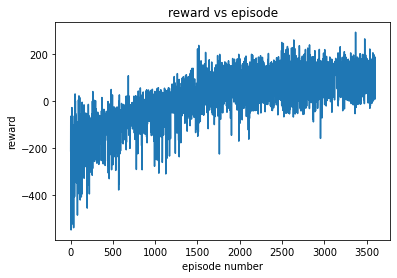

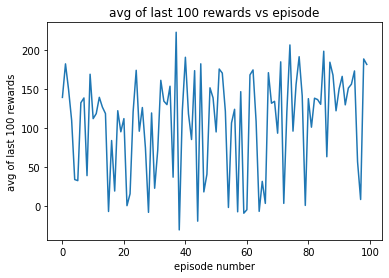

episode 3600   ep_reward 181.18669727034188    mean_reward_100 107.61278603108906
episode 3601   ep_reward 18.26519939957369    mean_reward_100 106.40422560306952
episode 3602   ep_reward 133.7277462666184    mean_reward_100 105.92254243411426
episode 3603   ep_reward 169.0404915069315    mean_reward_100 106.1220233969303
episode 3604   ep_reward 136.0040535223773    mean_reward_100 106.38307639533924
episode 3605   ep_reward 109.07926739767585    mean_reward_100 107.13025988200121
episode 3606   ep_reward 118.54163502547433    mean_reward_100 107.98603696869932
episode 3607   ep_reward 165.3338894365553    mean_reward_100 108.3165320005495
episode 3608   ep_reward 16.223920705164048    mean_reward_100 107.0946501371547
episode 3609   ep_reward 139.0041528903939    mean_reward_100 108.0911660226701
episode 3610   ep_reward 83.39751830636538    mean_reward_100 107.23847025742924
episode 3611   ep_reward 19.14321298271051    mean_reward_100 106.30951036265068
episode 3612   ep_reward 8.4

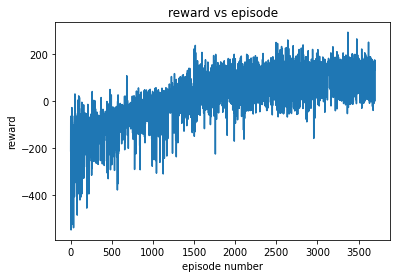

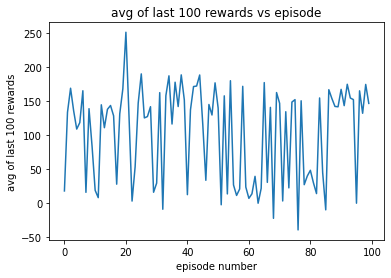

episode 3700   ep_reward 146.76575579645555    mean_reward_100 102.93763650934947
episode 3701   ep_reward 126.73346197570754    mean_reward_100 104.0223191351108
episode 3702   ep_reward 168.69742124467243    mean_reward_100 104.37201588489137
episode 3703   ep_reward 169.59980696270472    mean_reward_100 104.37760903944908
episode 3704   ep_reward 115.32118996057729    mean_reward_100 104.17078040383109
episode 3705   ep_reward -34.717388815174914    mean_reward_100 102.73281384170258
episode 3706   ep_reward 193.52549829914005    mean_reward_100 103.48265247443923
episode 3707   ep_reward 169.87296566020927    mean_reward_100 103.52804323667579
episode 3708   ep_reward 161.50584086904666    mean_reward_100 104.98086243831462
episode 3709   ep_reward 132.8037537719345    mean_reward_100 104.91885844713002
episode 3710   ep_reward 174.7590166095438    mean_reward_100 105.83247343016178
episode 3711   ep_reward 168.91601818240144    mean_reward_100 107.3302014821587
episode 3712   ep_r

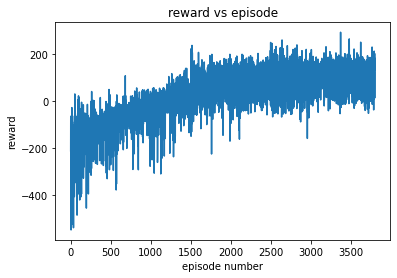

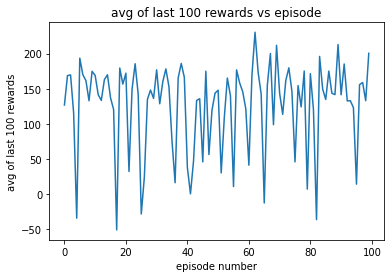

episode 3800   ep_reward 200.44519497493434    mean_reward_100 127.37239095069927
episode 3801   ep_reward 17.11926332922556    mean_reward_100 126.27624896423441
episode 3802   ep_reward 39.62453588693916    mean_reward_100 124.98552011065712
episode 3803   ep_reward 150.8862092293815    mean_reward_100 124.79838413332389
episode 3804   ep_reward 157.54388407456463    mean_reward_100 125.22061107446376
episode 3805   ep_reward 131.80793049295167    mean_reward_100 126.88586426754502
episode 3806   ep_reward 184.99199418797906    mean_reward_100 126.80052922643343
episode 3807   ep_reward 19.827248845752166    mean_reward_100 125.30007205828882
episode 3808   ep_reward -23.305261241931035    mean_reward_100 123.45196103717905
episode 3809   ep_reward 158.90954155492824    mean_reward_100 123.713018915009
episode 3810   ep_reward 115.56558480171702    mean_reward_100 123.12108459693074
episode 3811   ep_reward 139.03927140539767    mean_reward_100 122.8223171291607
episode 3812   ep_rew

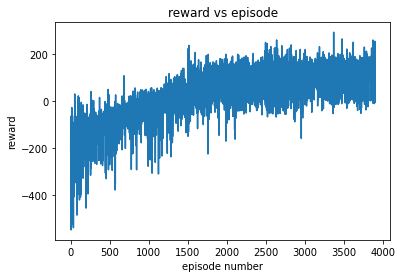

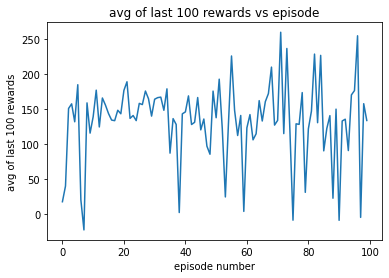

episode 3900   ep_reward 133.68309284260388    mean_reward_100 132.88103101893626
episode 3901   ep_reward 120.82007513197183    mean_reward_100 133.91803913696373
episode 3902   ep_reward 276.5309309958749    mean_reward_100 136.28710308805307
episode 3903   ep_reward 249.62314789985044    mean_reward_100 137.27447247475777
episode 3904   ep_reward -65.79380256485479    mean_reward_100 135.04109560836358
episode 3905   ep_reward 161.96018362889512    mean_reward_100 135.34261813972302
episode 3906   ep_reward 32.92181910708791    mean_reward_100 133.8219163889141
episode 3907   ep_reward 131.8124823041153    mean_reward_100 134.94176872349774
episode 3908   ep_reward 123.53274328018672    mean_reward_100 136.4101487687189
episode 3909   ep_reward 6.612507780771963    mean_reward_100 134.88717843097734
episode 3910   ep_reward 140.65076829875673    mean_reward_100 135.13803026594772
episode 3911   ep_reward 270.61263299919585    mean_reward_100 136.45376388188572
episode 3912   ep_rewa

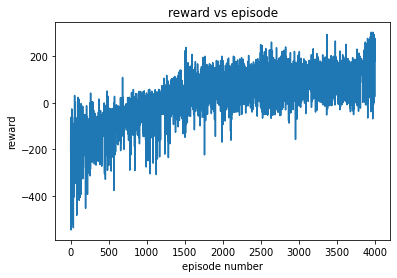

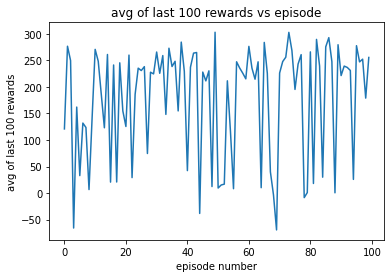

episode 4000   ep_reward 255.38262572407035    mean_reward_100 177.16228770517898
episode 4001   ep_reward 154.72398515383927    mean_reward_100 177.50132680539767
episode 4002   ep_reward 242.53467755096426    mean_reward_100 177.16136427094855
episode 4003   ep_reward 215.82948228448996    mean_reward_100 176.82342761479492
episode 4004   ep_reward 277.9764617193934    mean_reward_100 180.26113025763746
episode 4005   ep_reward 254.8320704974118    mean_reward_100 181.18984912632263
episode 4006   ep_reward 1.2157298895184425    mean_reward_100 180.87278823414692
episode 4007   ep_reward 225.2222520328133    mean_reward_100 181.80688593143387
episode 4008   ep_reward 202.02760042158462    mean_reward_100 182.59183450284786
episode 4009   ep_reward 243.33895483699808    mean_reward_100 184.95909897341014
episode 4010   ep_reward 172.78172992580355    mean_reward_100 185.28040858968063
episode 4011   ep_reward 18.92306056887871    mean_reward_100 182.76351286537746
episode 4012   ep_re

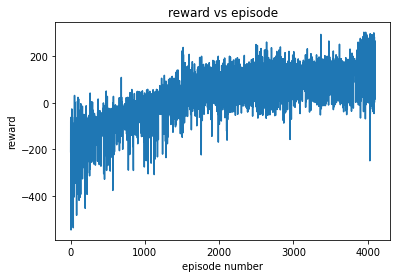

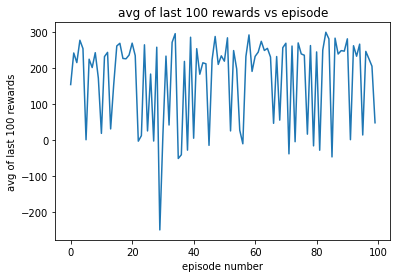

episode 4100   ep_reward 48.42654580749394    mean_reward_100 170.5786268984414
episode 4101   ep_reward 14.584711388175407    mean_reward_100 169.1772341607847
episode 4102   ep_reward 36.87663994263127    mean_reward_100 167.1206537847014
episode 4103   ep_reward 262.59576577250436    mean_reward_100 167.58831661958158
episode 4104   ep_reward 24.767838709060342    mean_reward_100 165.05623038947823
episode 4105   ep_reward 289.7218465756879    mean_reward_100 165.40512815026102
episode 4106   ep_reward -28.798770388857108    mean_reward_100 165.10498314747724
episode 4107   ep_reward 232.11559753968913    mean_reward_100 165.173916602546
episode 4108   ep_reward -6.42998996243216    mean_reward_100 163.0893406987058
episode 4109   ep_reward 258.81264245376144    mean_reward_100 163.24407757487344
episode 4110   ep_reward 247.09139113944994    mean_reward_100 163.9871741870099
episode 4111   ep_reward 279.9827460547025    mean_reward_100 166.59777104186819
episode 4112   ep_reward 26

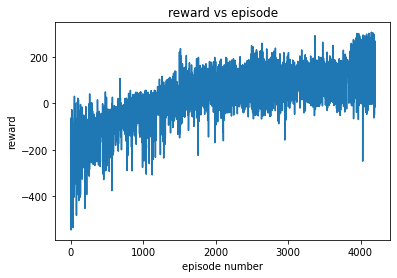

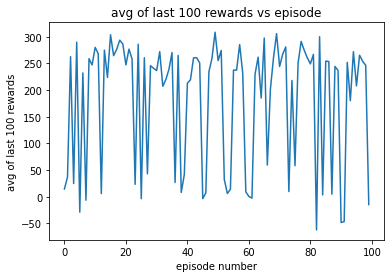

episode 4200   ep_reward -14.572537893979714    mean_reward_100 183.36775435274737
episode 4201   ep_reward 291.55390422026517    mean_reward_100 186.13744628106824
episode 4202   ep_reward 251.81720816700232    mean_reward_100 188.28685196331193
episode 4203   ep_reward 2.9110756267426723    mean_reward_100 185.69000506185435
episode 4204   ep_reward 260.2482817933423    mean_reward_100 188.04480949269717
episode 4205   ep_reward 298.67216935004836    mean_reward_100 188.13431272044076
episode 4206   ep_reward 305.8043433271301    mean_reward_100 191.4803438576006
episode 4207   ep_reward 238.87049867742832    mean_reward_100 191.547892868978
episode 4208   ep_reward 229.10845055062757    mean_reward_100 193.90327727410863
episode 4209   ep_reward 212.62750593590255    mean_reward_100 193.44142590893003
episode 4210   ep_reward 254.57542129228412    mean_reward_100 193.51626621045835
episode 4211   ep_reward 180.64846643538067    mean_reward_100 192.52292341426516
episode 4212   ep_re

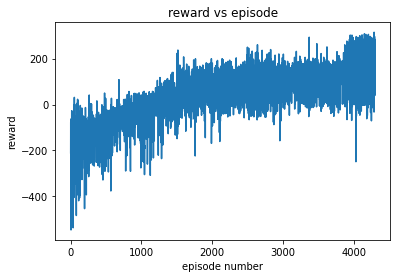

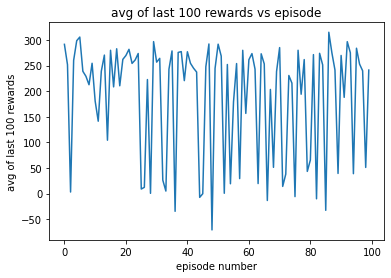

episode 4300   ep_reward 241.27227308494014    mean_reward_100 188.58279189024984
episode 4301   ep_reward 232.1162482813718    mean_reward_100 187.98841533086085
episode 4302   ep_reward 225.55106855523036    mean_reward_100 187.72575393474315
episode 4303   ep_reward 268.419921902034    mean_reward_100 190.38084239749602
episode 4304   ep_reward 279.1613482111131    mean_reward_100 190.56997306167375
episode 4305   ep_reward 239.96380872273681    mean_reward_100 189.98288945540062
episode 4306   ep_reward 267.4142519049651    mean_reward_100 189.59898854117895
episode 4307   ep_reward 301.03161262896066    mean_reward_100 190.22059968069428
episode 4308   ep_reward 287.0875844008235    mean_reward_100 190.80039101919624
episode 4309   ep_reward 286.67979262062596    mean_reward_100 191.54091388604354
episode 4310   ep_reward 274.3410639820535    mean_reward_100 191.73857031294122
episode 4311   ep_reward 273.0952124810463    mean_reward_100 192.66303777339783
episode 4312   ep_reward

In [ ]:
#train loop

import gym
import matplotlib.pyplot as plt
import tensorflow as tf
from gym.wrappers import Monitor
import pandas as pd

#Record video
display = Display(visible=0, size=(1400, 900))
display.start()
env=gym.make('LunarLander-v2')

env = Monitor(env, f'/content/gdrive/My Drive/lunar lander final', video_callable=lambda episode_id: episode_id%10==0, force=True)
print(env.observation_space)
print(env.observation_space.shape[0],env.action_space.n)
agent=Agent(env.observation_space.shape[0],env.action_space.n)
score_hist=[]
loss_hist=[]


#Train the agent for 10,000 episodes
for i in range(10000):
  terminal=False
  score=0
  current_state=env.reset()
#generate trajectories 
  while terminal!=True:
    action=agent.choose_action(current_state)
    next_state,reward,terminal,_=env.step(action)
    agent.save_trajectory(current_state,action,reward)
    current_state=next_state
    score+=reward
  score_hist.append(score)
  
#Save the model and print the rewards for episode
  if i%100==0:
    agent.save_model()
    plt.plot(score_hist)
    plt.title('reward vs episode')
    plt.xlabel('episode number')
    plt.ylabel('reward')
    plt.show()
    
    plt.plot(score_hist[-100:])
    plt.title('avg of last 100 rewards vs episode')
    plt.xlabel('episode number')
    plt.ylabel('avg of last 100 rewards')
    plt.show()
#stop training when the average reward for the last 100 episodes reaches greater than 210
  if np.mean(score_hist[-100:])>210:
    print('training complete,mean_reward_100 for prev 100 episodes > 210 ')
    break
#Call the function to calculate gradients and update the parameters of the network 
  agent.learn()
#Prints the current episode number, episode reward and the mean reward of last 100 episodes  
  print('episode',i,' ','ep_reward',score, ' ',' mean_reward_100',np.mean(score_hist[-100:]))



#Save the final version of the model after training loop termination.Specify the path to the Google Drive folder to save the model.
agent.model.save('/content/gdrive/My Drive/lunar lander final/predict_pg.h5')


In [ ]:
#Install display dependencies
#DO NOT modify the cell

!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.*
from pyvirtualdisplay import Display
display = Display(visible=False, size=(1400, 900))
_ = display.start()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


Test Loop

In [ ]:
#test loop



import gym
import matplotlib.pyplot as plt
import tensorflow as tf
from gym.wrappers import Monitor
import pandas as pd
from tensorflow import keras


import pyvirtualdisplay

from gym.wrappers.monitoring.video_recorder import VideoRecorder





rewards_list = []

#Specify the no of episodes to test the trained  agent 
num_test_episode = 100
env = gym.make("LunarLander-v2")

#Function to record the test agent video.Specify the path to the Google Drive folder to save mp4 files.

env = Monitor(env, f'/content/gdrive/My Drive/lunar lander final test', video_callable=lambda episode_id: True, force=True)

print("Starting Testing of the trained model...")


#Specify the path of the trained model stored in Google Drive to load the trained model.
model_test= keras.models.load_model('/content/gdrive/My Drive/lunar lander final/predict_pg.h5',compile=False)

#main test loop
for test_episode in range(num_test_episode):
    current_state = env.reset()
    num_observation_space = env.observation_space.shape[0]
    current_state = np.reshape(current_state, [1, num_observation_space])
    reward_for_episode = 0
    while True:
    
      selected_action = np.argmax(model_test.predict(current_state)[0])
      new_state, reward, done, info = env.step(selected_action)
      new_state = np.reshape(new_state, [1, num_observation_space])
      current_state = new_state
      reward_for_episode += reward
      if done:
        break
    rewards_list.append(reward_for_episode)
    print(test_episode, "\t: Episode || Reward: ", reward_for_episode)


env.close()


Starting Testing of the trained model...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


0 	: Episode || Reward:  241.04904330475284
1 	: Episode || Reward:  246.2419222552856
2 	: Episode || Reward:  229.92774811731843
3 	: Episode || Reward:  242.23358415001078
4 	: Episode || Reward:  245.636374800587
5 	: Episode || Reward:  231.31125301929222
6 	: Episode || Reward:  265.29896584332397
7 	: Episode || Reward:  227.5701593834275
8 	: Episode || Reward:  249.83388564790593
9 	: Episode || Reward:  223.65023829914463
10 	: Episode || Reward:  261.1125440805831
11 	: Episode || Reward:  224.44073755381066
12 	: Episode || Reward:  268.08377714957254
13 	: Episode || Reward:  238.69710812087433
14 	: Episode || Reward:  227.15763897579927
15 	: Episode || Reward:  232.93831033843367
16 	: Episode || Reward:  247.9582769376867
17 	: Episode || Reward:  257.41401320642365
18 	: Episode || Reward:  227.49925046100202
19 	: Episode || Reward:  226.0974170161296
20 	: Episode || Reward:  225.7409455570805
21 	: Episode || Reward:  205.70746430244975
22 	: Episode || Reward:  20

Graph of trained agent for all episodes

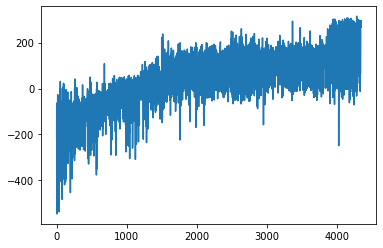

In [ ]:
#Plot of rewards vs episodes
plt.plot(score_hist)
plt.title('reward vs episode')
plt.xlabel('episode number')
plt.ylabel('reward')
plt.show()